# Shallow Segmentation with edge filter
The notebook present a segmentation implementation in scikit-image and numpy

In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import watershed, dilation, square
from skimage.measure import label, regionprops
from skimage.filters import gaussian, sobel, roberts
from skimage.feature import canny
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import matplotlib.patches as mpatches
from skimage.morphology import binary_erosion, remove_small_objects, closing
from skimage.morphology import watershed, disk
from skimage.filters import rank
%matplotlib inline

In [2]:
pwd = "/home/hh162/Documents/code/skimage_segmentation/" #present working directory
imgs = ["items1.JPG", "items2.JPG"] #list of images
nums = [3, 1]
seg_size = 256

In [3]:
def detect_rect_bound(img, label, area_threshold=0.05):
    """plot a rectangular bound around the segmented image"""
    obj_num = 0
    rect_bounds = []
    for region in regionprops(label):
    # take regions with large enough areas
        if region.area >= np.product(np.asarray(label.shape)) * area_threshold:
            obj_num += 1
            # draw rectangle around segmented coins
            rect_bound = region.bbox
            rect_bounds.append(rect_bound)
    return (obj_num, rect_bounds)

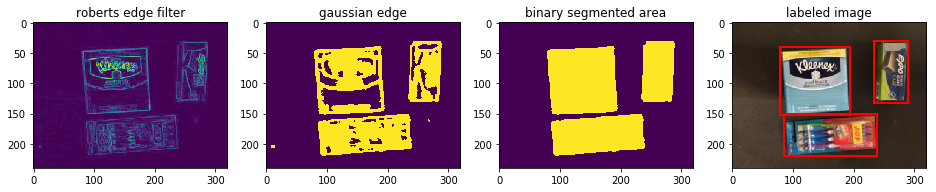

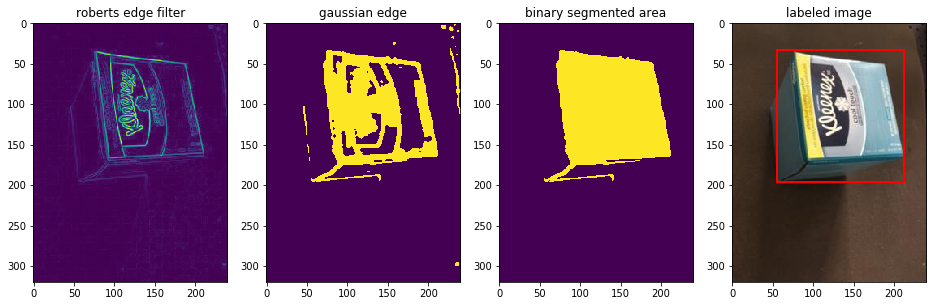

In [7]:
for fname,num in zip(imgs,nums):
    obj_num = 0
    edge_threshold = 0.03
    img = imread(os.path.join(pwd, fname))
    img_gray = rgb2gray(img)
    roberts_edge = roberts(img_gray)
    gaussian_edge = gaussian(roberts_edge, sigma=1)
    gaussian_edge = gaussian_edge > 0.03
    conv = ndi.binary_fill_holes(gaussian_edge > edge_threshold)
    #conv = binary_erosion(conv,3)
    conv = remove_small_objects(conv, 0.05*np.prod(np.asarray(img_gray.shape)))
    seg, num= label(conv, connectivity=1.5, return_num=True)
    obj_num, rect_bounds = detect_rect_bound(img, seg)
    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,16))
    ax = axes.ravel()
    ax[0].imshow(roberts_edge)
    ax[0].set_title("roberts edge filter")
    ax[1].imshow(closing(gaussian_edge > 0.1))
    ax[1].set_title("gaussian edge")
    ax[2].imshow(conv)
    ax[2].set_title("binary segmented area")
    ax[3].imshow(img)
    ax[3].set_title("labeled image")
    for bound in rect_bounds:
        rect = mpatches.Rectangle((bound[1], bound[0]), bound[3] - bound[1], bound[2] - bound[0],
                              fill=False, edgecolor='red', linewidth=2)
        ax[3].add_patch(rect)
